# Descriptive Statistics with Python


## Part II:  Customize ticks with large numbers


## II-1 Build the Pandas Dataframe example

Let us build again the same DataFrame as in the Part I: a simple dataset of typical customer information. To begin with, we import the necessary modules.

In [1]:
%matplotlib notebook
# to get inline plots in the present notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let _N_ be the number of customers:

In [2]:
N = 1000

In [3]:
# CUSTOMER ID
idstr = ['ID']*N    # idstr = ['ID', 'ID', 'ID', 'ID', 'ID', ...] N-times
nstrarray = np.array(range(N), str)     # nstrarray = ['0', '1', '2', ..., 'N-1']
idcli = map(str.__add__, idstr, nstrarray)    # idcli = ['ID0', 'ID1', 'ID2', 'ID3', ...,]

# AGES
age = np.random.randint(16,95,N)

# GEOGRAPHICAL AREA
geo = np.array(np.random.randint(1,9,N), str)

geo_value = ['1', '2', '3', '4', '5', '6', '7', '8']
geo_area = ['N', 'E', 'S', 'W', 'NE', 'SE', 'SW', 'NW']

for j in range(len(geo_value)): #replace each number with a direction
    geo[geo == geo_value[j]] = geo_area[j]

# AMOUNT OF MONEY OF EVERY CUSTOMER
mean = 10**5
sigma = 3*10**4
amo = np.array(np.random.normal(mean,sigma,N), int)
amo[amo <= 0] = np.random.randint(1,mean,1)

# NUMBER OF INSTRUMENTS IN THE PORTFOLIOS OF EVERY CUSTOMER
mean_i = 20
sigma_i = 8
ninstr = np.array(np.random.normal(20,8,N), int)
ninstr[ninstr <= 0] = np.random.randint(1,mean_i,1)

# BUILD THE DATAFRAME
df = pd.DataFrame({'ID': idcli, 'AGE': age, 'GEO': geo, 'N_INSTR': ninstr, 'AMOUNT': amo})

# ORDER THE COLUMNS
db = df[['ID', 'AGE', 'GEO', 'N_INSTR', 'AMOUNT']]

# PRINT THE FIRST FIVE ENTRIES OF DATAFRAME
db[0:5]

,ID,AGE,GEO,N_INSTR,AMOUNT
0,ID0,31,W,15,119870
1,ID1,84,W,21,94755
2,ID2,75,S,19,130586
3,ID3,53,W,18,84944
4,ID4,78,E,31,158631


## II-2 Customization of ticks 

**(II-2-1)** Define a function that trasform large number (above one thousand) in a string in the form '#.##k', '#.##M' and '#.##G' for the domain of thousands, millions and billions, respectively. To this aim, let us define these preliminary functions: 

In [4]:
def O(x):
    """
    Order of magnitude of real number X
    """
    if np.any(x == 0):
        return 0
    else:
        return int(np.log10(abs(x)))

def power10_scaled_number(x, power = 3):
    """
    Rescale X on base 10 to the power of O(X)-mod(O(X),POWER).
    """
    return float(x)/10**(O(x)-O(x)%power)

def rem_point_zero(x):
    """
    Remove ".0" if the real number X is an integer
    """
    if np.any(x-int(x) == 0.0):
        return int(x)
    else:
        return x

def rounded_power10_scaled_number(x, round_figure, power = 3):
    """
    Round and rescale the number X on base 10 to the power of O(X)-mod(O(X),POWER)
    """
    return rem_point_zero(round(power10_scaled_number(x, power), round_figure))

def real2str10(x, round_figure, power = 3, 
               label = ['n', 'u', 'm', '', 'k', 'M', 'G', 'T']):
    """
    Round and rescale the number X and transform it to a string with in the form '#.##k', '#.##M' and '#.##G' 
    for the domain of thousands, millions and billions, respectively.
    """
    if np.any(x == 0.0):
        return '0'
    else:
        return str(rounded_power10_scaled_number(x, round_figure, power))+label[(O(x)+power**2)/power]

Let us give a try:

In [5]:
power = 3
round_figure = 1
x = [1.23456789*10**(-9), 1.23456789*10**(-8), 1.23456789*10**(-7),
     1.23456789*10**(-6), 1.23456789*10**(-5), 1.23456789*10**(-4), 
     1.23456789*10**(-3), 1.23456789*10**(-2), 1.23456789*10**(-1), 
     1.23456789*10**(+0), 
     1.23456789*10**(+1), 1.23456789*10**(+2), 1.23456789*10**(+3), 
     6.23456789*10**(+4), 6.23456789*10**(+5), 1.23456789*10**(+6),
     1.23456789*10**(+7), 1.23456789*10**(+8), 1.23456789*10**(+9)]
vo = map(O, x); 
fop = lambda x : O(x)-O(x)%power; vop = map(fop, x); 
fpsn = lambda x: power10_scaled_number(x, power); vpsn = map(fpsn, x)
frpsn = lambda x: rounded_power10_scaled_number(x, round_figure, power); vrpsn = map(frpsn, x)
fr2s = lambda x: real2str10(x, round_figure, power); vr2s = map(fr2s, x)
ft= lambda x: (O(x)+power**2)/power; vft = map(ft, x) 
X = pd.DataFrame({'Data Number': x, 'O(x)': vo, 'OF(x)': vft,
                  'Factor':vop, 
                  'Scaled': vpsn,
                  'Scaled Rounded': vrpsn,
                  'String': vr2s})
print X

     Data Number  Factor  O(x)  OF(x)      Scaled  Scaled Rounded  String
0   1.234568e-09      -9    -8      0    1.234568             1.2    1.2n
1   1.234568e-08      -9    -7      0   12.345679            12.3   12.3n
2   1.234568e-07      -6    -6      1    0.123457             0.1    0.1u
3   1.234568e-06      -6    -5      1    1.234568             1.2    1.2u
4   1.234568e-05      -6    -4      1   12.345679            12.3   12.3u
5   1.234568e-04      -3    -3      2    0.123457             0.1    0.1m
6   1.234568e-03      -3    -2      2    1.234568             1.2    1.2m
7   1.234568e-02      -3    -1      2   12.345679            12.3   12.3m
8   1.234568e-01       0     0      3    0.123457             0.1     0.1
9   1.234568e+00       0     0      3    1.234568             1.2     1.2
10  1.234568e+01       0     1      3   12.345679            12.3    12.3
11  1.234568e+02       0     2      3  123.456789           123.5   123.5
12  1.234568e+03       3     3      4 

**(II-2-2)** Given a number _n_, let us define three functions:
* `range2str10` that takes the array x and returns an array of rounded, rescaled numbers in the form '#.##k', '#.##M' and '#.##G'.
* `rangescaler` that returns an array of _M_ percentage values of _n_, rounded and rescaled according the function `real2str10`;
* `rangescaler2str10` that returns an array of _M_ percentage values of _n_ in the form '#.##k', '#.##M' and '#.##G'.

In [6]:
def range2str10(x, round_figure = 0, label = ['n', 'u', 'm', '', 'k', 'M', 'G', 'T']):
    f = lambda x : real2str10(x, round_figure = round_figure, label= label)
    return map(f, x)

def rangescaler(x, round_figure = 0, 
                percentage_list = [0.0, 0.1, 0.2, 0.5, 1.0]):
    f = lambda x : rounded_power10_scaled_number(x, round_figure)
    return map(f,x*np.array(percentage_list))

def rangescaler2str10(x, round_figure = 0, 
                    percentage_list = [0.0, 0.1, 0.2, 0.5, 1.0], 
                    label = ['n', 'u', 'm', '', 'k', 'M', 'G', 'T']):
    f = lambda x : real2str10(x, round_figure = round_figure, label = label)
    return map(f, x*np.array(percentage_list))

## II-3 Histograms with customized ticks for large numbers

In [7]:
db_amount_geo = db.groupby('GEO')['AMOUNT'].sum()
db_amount_geo = db_amount_geo.sort_values(ascending = False)
db_amount_geo

GEO
S     13862224
N     13476874
SE    13442889
E     12833031
NE    12724480
NW    11650154
W     11592045
SW    11564544
Name: AMOUNT, dtype: int64

Now, repeat the steps as in the previous section to get the histograms associated to the Pandas Series `db_count_geo`.

<IPython.core.display.Javascript object>


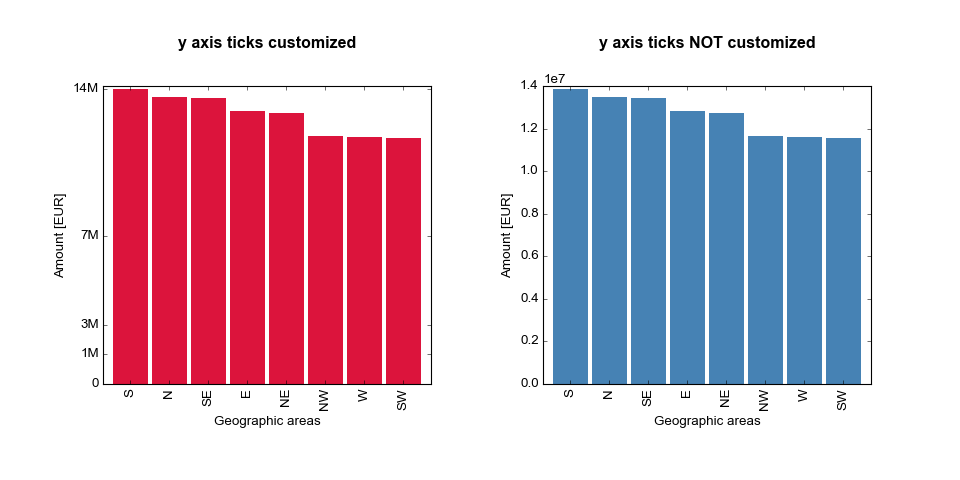

In [8]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 12
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
fig.tight_layout(pad = 6) # help the subplot to fit the figure area
# first sublot ####################################################
plot_title = 'y axis ticks customized\n '
x_axis_label = 'Geographic areas'
y_axis_label = 'Amount [EUR]'
AX0 = axes[0]

# see DataFrame.plot for all options
db_amount_geo.plot(ax = AX0,   kind = 'bar',  color='crimson', width = 0.9, label='CNT', edgecolor = "none")
# put legend in the upper right corner, with no frame and fontsize = 12
#AX0.legend(loc = 0, frameon = False, fontsize = 12)
x_ticks_position = range(len(db_amount_geo.index))
xticks_labels = list(db_amount_geo.index)
# set x ticks in the positions given by `ticks_position`
AX0.set_xticks(x_ticks_position)
# set the labels of x ticks as given by the array `xticks_labels`, with rotation of 90 degrees
AX0.set_xticklabels(xticks_labels, rotation = 90)
y_ticks_position =  max(db_amount_geo)*np.array([0.0, 0.1, 0.2, 0.5, 1.0])
yticks_labels = rangescaler2str10(max(db_amount_geo), round_figure = 0, 
                    percentage_list = [0.0, 0.1, 0.2, 0.5, 1.0], 
                    label = ['n', 'u', 'm', '', 'k', 'M', 'G', 'T'])
# set x ticks in the positions given by `ticks_position`
AX0.set_yticks(y_ticks_position)
# set the labels of x ticks as given by the array `xticks_labels`, with rotation of 90 degrees
AX0.set_yticklabels(yticks_labels)

AX0.set_xlabel(x_axis_label)
AX0.set_ylabel(y_axis_label)
AX0.set_title(plot_title, fontweight='bold', y = 1.05)

# second sublot ####################################################
plot_title = 'y axis ticks NOT customized\n '
x_axis_label = 'Geographic areas'
y_axis_label = 'Amount [EUR]'
AX1 = axes[1]

# see DataFrame.plot for all options
db_amount_geo.plot(ax = AX1,   kind = 'bar',  color='steelblue', width = 0.9, label='CNT', edgecolor = "none")
# put legend in the upper right corner, with no frame and fontsize = 12
#AX0.legend(loc = 0, frameon = False, fontsize = 12)
x_ticks_position = range(len(db_amount_geo.index))
xticks_labels = list(db_amount_geo.index)
# set x ticks in the positions given by `ticks_position`
AX1.set_xticks(x_ticks_position)
# set the labels of x ticks as given by the array `xticks_labels`, with rotation of 90 degrees
AX1.set_xticklabels(xticks_labels, rotation = 90)

AX1.set_xlabel(x_axis_label)
AX1.set_ylabel(y_axis_label)
AX1.set_title(plot_title, fontweight='bold', y = 1.05)

Left panel is much more clear, isn't it?

### Customization of both axes ticks

In [9]:
age_bin = [0, 18, 35, 50, 65, 80, 120]
age_bin_labels = ['<18', '18-35', '35-50', '50-65', '65-80', '80+']
db_age = db.groupby(pd.cut(db['AGE'], age_bin))['AMOUNT'].sum()
db_age

AGE
(0, 18]       4194346
(18, 35]     24146239
(35, 50]     19058291
(50, 65]     18347336
(65, 80]     17202727
(80, 120]    18197302
Name: AMOUNT, dtype: int64

<IPython.core.display.Javascript object>


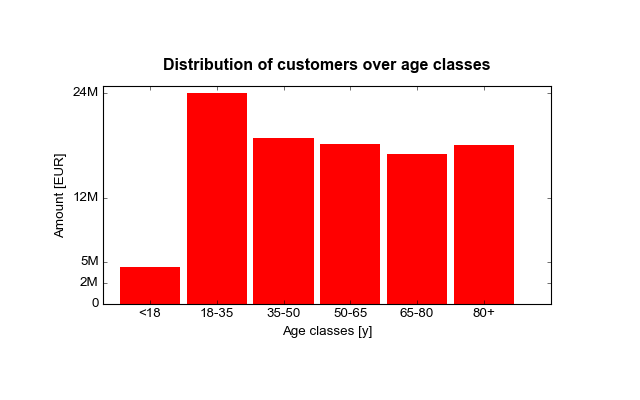

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 5))
fig.tight_layout(pad = 6) # help the subplot to fit the figure area
# first sublot ####################################################
plot_title = 'Distribution of customers over age classes'
x_axis_label = 'Age classes [y]'
y_axis_label = 'Amount [EUR]'
AX0 = axes

# see DataFrame.plot for all options
db_age.plot(ax = AX0,   kind = 'bar',  color='r', width = 0.9, label='CNT', edgecolor = "none")
# put legend in the upper right corner, with no frame and fontsize = 12
#AX0.legend(loc = 0, frameon = False, fontsize = 12)
ticks_position = range(len(age_bin))
xticks_labels = age_bin_labels
# set x ticks in the positions given by `ticks_position`
AX0.set_xticks(ticks_position)
# set the labels of x ticks as given by the array `xticks_labels`, with rotation of 90 degrees
AX0.set_xticklabels(xticks_labels, rotation = 0)

y_ticks_position = max(db_age)*np.array([0.0, 0.1, 0.2, 0.5, 1.0])
yticks_labels = rangescaler2str10(max(db_age), round_figure = 0, 
                    percentage_list = [0.0, 0.1, 0.2, 0.5, 1.0], 
                    label = ['n', 'u', 'm', '', 'k', 'M', 'G', 'T'])
# set x ticks in the positions given by `ticks_position`
AX0.set_yticks(y_ticks_position)
# set the labels of x ticks as given by the array `xticks_labels`, with rotation of 90 degrees
AX0.set_yticklabels(yticks_labels)

AX0.set_xlabel(x_axis_label)
AX0.set_ylabel(y_axis_label)
AX0.set_title(plot_title, fontweight='bold', y = 1.05)

### END